In [ ]:
from platform import python_version
python_version()

'3.7.10'

#### To sagemaker run

Some repairs to run the notebook on sagemaker studio

In [ ]:
%pip install -r requirements.txt

In [ ]:
%pip install s3fs

#### Imports

In [3]:
# Imports

import random 
import sagemaker
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)


#### Data Load on SageMaker

In [3]:

from sagemaker import get_execution_role
role = get_execution_role()
print(role)

arn:aws:iam::583575929931:role/service-role/AmazonSageMaker-ExecutionRole-20220122T165816


In [4]:
s3_bucket = 'kiq-bucket'
prefix = 'dados'

In [5]:
raiz = f's3://{s3_bucket}/{prefix}/'
print(raiz)


s3://kiq-bucket/dados/


In [7]:
df = pd.read_csv(raiz + 'dataset.csv')

In [8]:
df.head()

,class,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,No,16.192875,14.000000,19.000000,2.146700
1,No,13.383857,4.000000,3.000000,0.000000
2,No,28.554000,6.000000,12.000000,2.065591
3,No,3.536667,5.725649,1.635738,0.571832
4,No,16.561000,11.451297,8.728523,2.099426


In [9]:
df.shape

(9948, 5)

#### Data Load to test

In [9]:
# df = pd.read_csv('dataset.csv')

In [10]:
# df.head()

,class,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,No,16.192875,14.000000,19.000000,2.146700
1,No,13.383857,4.000000,3.000000,0.000000
2,No,28.554000,6.000000,12.000000,2.065591
3,No,3.536667,5.725649,1.635738,0.571832
4,No,16.561000,11.451297,8.728523,2.099426


In [11]:
# df.shape

(9948, 5)

In [12]:
# Exploratory Analyse 
df.describe()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
count,9948.000000,9948.000000,9948.000000,9948.000000
mean,15.732258,5.881994,9.591503,1.021472
std,9.703593,5.896722,10.371288,1.231041
min,0.122124,0.000000,0.000000,0.000000
25%,7.455795,1.225649,2.000000,0.000000
50%,14.613946,4.000000,6.728523,0.836660
75%,22.918650,9.000000,14.000000,1.634458
max,50.900000,40.000000,141.000000,29.444864


<function matplotlib.pyplot.show(*args, **kw)>

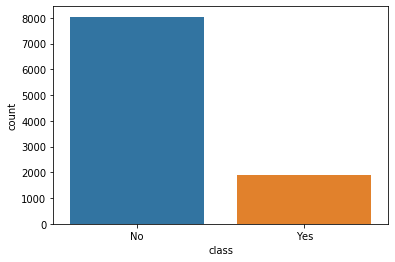

In [13]:
sns.countplot(df['class'],label='Count')
plt.show

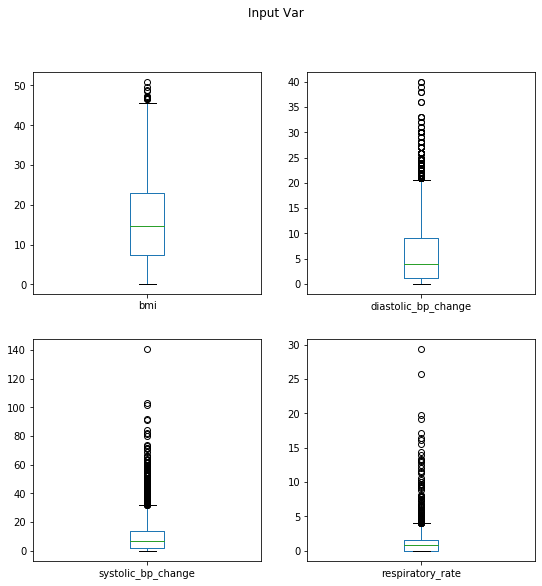

In [14]:
df.plot(kind='box',subplots=True,layout=(2,2),sharex = False,sharey= False,figsize=(9,9),title = 'Input Var')
plt.show()

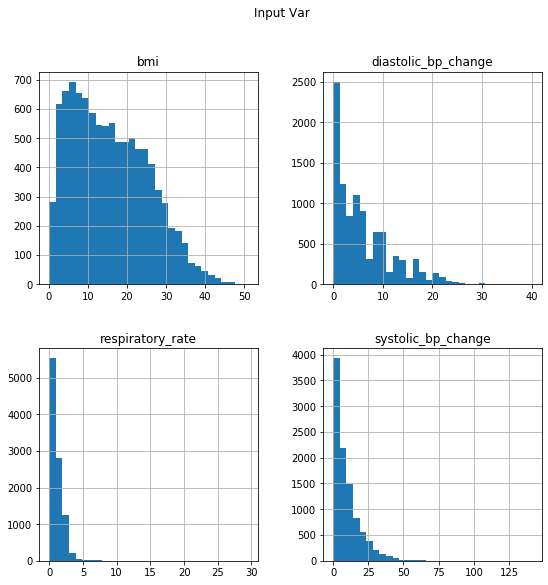

In [15]:
df.hist(bins=30,figsize=(9,9))
pl.suptitle("Input Var")
plt.show()

#### Data preprocessing


In [16]:

x = df[['bmi','diastolic_bp_change','systolic_bp_change','respiratory_rate']]
y = df[['class']]

In [17]:
# Encoder
label_encoder = LabelEncoder()
label_encoder.fit(['Yes','No'])

y = label_encoder.transform(y)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
y

array([0, 0, 0, ..., 0, 0, 0])

#### Train and test explit


In [19]:

X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=123)

In [20]:
X_train.shape

(7461, 4)

In [21]:
X_test.shape

(2487, 4)

#### Pattern


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train Dataframe


In [23]:
X_train = pd.DataFrame(X_train,columns=['bmi','diastolic_bp_change','systolic_bp_change','respiratory_rate'])
Y_train = pd.DataFrame(Y_train,columns=['class'])
df_train = pd.concat([X_train,Y_train],axis = 1)
df_train.head()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate,class
0,-1.483765,-1.003436,-0.927406,-0.817379,0
1,0.947850,-1.003436,-0.927406,-0.662177,1
2,-1.034765,2.206180,2.057467,-0.817379,0
3,-1.406122,0.179054,-0.445975,-0.817379,0
4,0.366195,-0.665582,0.228029,-0.431359,0


#### Test Dataframe


In [24]:
X_test = pd.DataFrame(X_test,columns=['bmi','diastolic_bp_change','systolic_bp_change','respiratory_rate'])
Y_test = pd.DataFrame(Y_test,columns=['class'])
df_test = pd.concat([X_test,Y_test],axis=1)
df_test.head()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate,class
0,-0.940089,-0.403964,-0.279542,-0.817379,0
1,-0.502614,-0.665582,0.131742,-0.362450,0
2,1.078473,0.347981,0.228029,-0.817379,0
3,-0.636164,-0.251491,0.587034,-0.817379,1
4,-0.528479,2.037253,1.383463,0.185934,1


#### Dataframe batch normalization


In [25]:
batch_test_df = df_test.drop(['class'],axis=1)
batch_test_df.head()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,-0.940089,-0.403964,-0.279542,-0.817379
1,-0.502614,-0.665582,0.131742,-0.362450
2,1.078473,0.347981,0.228029,-0.817379
3,-0.636164,-0.251491,0.587034,-0.817379
4,-0.528479,2.037253,1.383463,0.185934


#### Save data on S3


In [26]:
df_train.to_csv(raiz + 'train.csv',header=False,index=False)
df_train.to_csv(raiz + 'train_withHeader.csv',header=True,index=False)
df_test.to_csv(raiz + 'test.csv', header=False,index=False)
batch_test_df.to_csv(raiz + 'batch_test.csv',header=False,index=False)


#### Syntactic data to simulations


In [27]:

def get_random_val():
    val = random.uniform(0,1)
    return round(val,6)

In [28]:
def generate_row():
    row = []
    for _ in range(4):
        row.append(get_random_val())
    return row

In [29]:
def generate_dataset():
    rows = []
    for _ in range(20):
        rows.append(generate_row())
    return rows

In [30]:
rows = generate_dataset()

In [31]:
df = pd.DataFrame(rows,columns=['bmi','diastolic_bp_change','systolic_bp_change','respiratory_rate'])

In [32]:
df.head()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,0.164283,0.354808,0.711706,0.690751
1,0.476693,0.896341,0.691990,0.728903
2,0.339256,0.165434,0.683241,0.304577
3,0.083595,0.056383,0.074347,0.908008
4,0.656587,0.432302,0.664537,0.500040


In [33]:
df.to_csv(raiz + 'simulation_data.csv',header=False,index=False)